# Assignment_5_2_Clustering_Kmeans :

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
file_url = "https://raw.githubusercontent.com/PacktWorkshops/The-Applied-Artificial-Intelligence-Workshop/master/Datasets/Sales_Transactions_Dataset_Weekly.csv"
df = pd.read_csv(file_url)
df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


In [3]:
# keep only weekly columns as features

weekly_cols = [c for c in df.columns if c.startswith("W")]
X = df[weekly_cols]

In [4]:
# Scale Features to make them all using the same scale so that we do not give weight to one variable over the other only becasue its scale is bigger:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

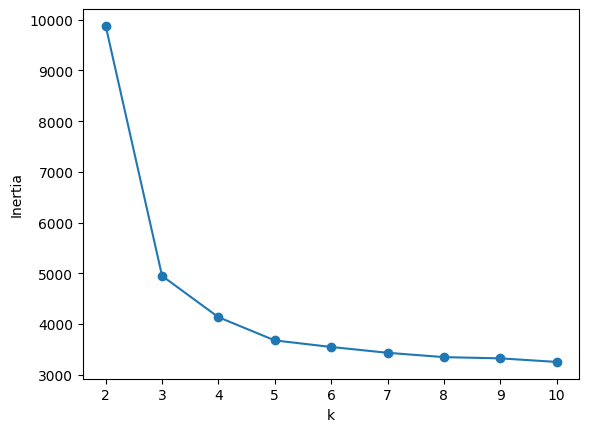

In [ ]:
# We Evaluate the best number of K based on the Elbow method : 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)

plt.plot(K, inertias, marker="o")
plt.xlabel("k"); plt.ylabel("Inertia"); plt.show()



# >> The best chosen K is 4

In [13]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# attach cluster labels to original products
df_clusters = df.copy()
df_clusters["cluster"] = labels

df_clusters[["Product_Code", "cluster"]].head(10)


,Product_Code,cluster
0,P1,2
1,P2,1
2,P3,2
3,P4,2
4,P5,2
5,P6,1
6,P7,1
7,P8,2
8,P9,2
9,P10,3
